# Introduction
Python is an interpreted object-oriented, high-level programming language with dynamic semantics. Some features include:
* Open source: python and its libraries are open source with flexible licenses.
* Interpreted: the CPython implementation is an interpreter for the language that translates python code at runtime to executable byte code.
* Multiparadigm: it supports different programming and implementation paradigms, such as object orientation and imperative, functional, or procedural programming.
* Multipurpose: it can be used for rapid prototyping and development as well as for building large applications; it can be used for low-level systems operations as well as for high-level analytics tasks.
* Cross-platform: it is available for the most important operation systems, such as Windows, Linux and macOS.
* Garbage collection: it has automated garbage collection, avoiding the need for the programmer to manage memory.


In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## The Scientific Stack
* ### NumPy
NumPy provides a multidimensional array object to store homogeneous or
heterogeneous data; it also provides optimized functions/methods to operate
on this array object.

* ### SciPy
SciPy is a collection of subpackages and functions implementing important
standard functionality often needed in science or finance; for example, one
finds functions for cubic splines interpolation as well as for numerical
integration.
* ### matplotlib
This is the most popular plotting and visualization package for Python,
providing both 2D and 3D visualization capabilities.
* ### pandas
pandas builds on NumPy and provides richer classes for the management and
analysis of time series and tabular data; it is tightly integrated with
matplotlib for plotting and PyTables for data storage and retrieval.
* ### scikit-learn
scikit-learn is a popular machine learning (ML) package that provides a
unified application programming interface (API) for many different ML
algorithms, such as for estimation, classification, or clustering.
* ### PyTables
PyTables is a popular wrapper for the HDF5 data storage package; it is a
package to implement optimized, disk-based I/O operations based on a
hierarchical database/file format.

# Working machine learning with pipelines

***mlflow***: 

MLflow is an open source platform for managing the end-to-end machine learning lifecycle. It tackles three primary functions:

* Tracking experiments to record and compare parameters and results (MLflow Tracking).

* Packaging ML code in a reusable, reproducible form in order to share with other data scientists or transfer to production (MLflow Projects).

* Managing and deploying models from a variety of ML libraries to a variety of model serving and inference platforms (MLflow Models).

MLflow is library-agnostic. You can use it with any machine learning library, and in any programming language, since all functions are accessible through a REST API and CLI. For convenience, the project also includes a Python API, R API, and Java API.

https://mlflow.org/docs/latest/index.html


***kubeflow*** :

The Kubeflow project is dedicated to making deployments of machine learning (ML) workflows on Kubernetes simple, portable and scalable. Our goal is not to recreate other services, but to provide a straightforward way to deploy best-of-breed open-source systems for ML to diverse infrastructures. Anywhere you are running Kubernetes, you should be able to run Kubeflow.

Getting started with Kub
https://www.kubeflow.org/docs/about/kubeflow/


***TFX***:

TensorFlow Extended (TFX) is an end-to-end platform for deploying production ML pipelines
When you’re ready to move your models from research to production, use TFX to create and manage a production pipeline.

https://www.tensorflow.org/tfx/tutorials/tfx/components

# An example on how python can be used to evaluate a (European) option
First som mathematical notation
* inital stock price $S_0 = 100$
* strike price $K = 105 $
* time to maturity $T = 1$ year
* constant riskless short rate $r = 0.05$
* volatility $\sigma = 0.2$
Then the Black-Scholes model is given by, where $z$ is a random normaly distributed variable
<br>
$S_t = S_0 \exp\big((r - \frac{1}{2}\sigma^2 )T + \sigma \sqrt(T)z\big)$
<br/>

1. Draw pseudo-random numbers , $z(i), i \in \{1,2, \dots, I\}$ from
the standard normal distribution.
2. Calculate all resulting index levels at maturity $S_T(i)$ for given $z(i)$ in the above
Equation.
3. Calculate all inner values of the option at maturity as $h_T(i) = \max \big(S_T(i) - K, 0\big)$
.
4. Estimate the option present value via the Monte Carlo estimator as
given in
<br>
$C_0 \approx \frac{1}{I}\exp\big(-rT\big)\sum_{I}h_T(i)$
<br/>

In [2]:
import math
import numpy as np

In [3]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
I = 100000
np.random.seed(1000) # fix randomess, so you get same result when runing multiple times
z = np.random.standard_normal(I)
ST = S0 * np.exp((r - sigma ** 2/2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)
C0 = math.exp(-r * T) * np.mean(hT)
print('Value of the European call option: {:5.3f}'.format(C0))

Value of the European call option: 8.019


In [4]:
from utils import PROJECT_DATA_DIR
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
price_cl = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'closing_prices.csv'))
price_cl.set_index('date', inplace=True)

In [6]:
price_cl.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.294495,NaN,21.129273,49.792737,133.90,16.673423,45.640616,14.639460,19.648366,32.843185,...,13.934719,47.114847,34.709530,18.323770,27.878733,20.694802,20.828887,22.385830,43.935552,53.998112
2010-01-05,27.341684,NaN,20.958563,49.365427,134.69,16.797192,47.135432,15.115313,19.341720,34.098954,...,13.735967,47.130264,34.407096,18.234010,27.834524,20.457660,20.566022,23.000375,43.498060,54.208950
2010-01-06,26.906778,NaN,21.074956,48.994453,132.25,16.929801,48.565255,15.292591,19.334054,35.161528,...,13.691800,46.906716,34.407096,17.971143,28.108625,20.182950,20.274994,23.033151,43.400840,54.677481
2010-01-07,26.857038,NaN,21.249546,48.545833,130.00,16.823714,50.531263,15.796435,19.349386,35.258126,...,13.640272,46.652332,34.836130,17.769366,29.187345,20.370786,20.154309,23.868932,43.425145,54.505686
2010-01-08,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039


In [7]:
data = pd.DataFrame(price_cl['AAPL'])
data['Returns'] = np.log(data/data.shift())
data.dropna(inplace=True)
lags = 6

cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace=True)

In [8]:
data.head()

,AAPL,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
date,,,,,,,,
2010-01-13,26.865966,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,26.710369,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,26.263985,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-19,27.425859,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-20,27.003070,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0


### Machine learning: support vector machine
Note, data is not splitted in training and test sets

In [9]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [10]:
%%html
<iframe src="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html" width="1100" height="1000"></iframe>

In [11]:
model = SVC(gamma='auto')
X = data[cols]
y = np.sign(data['Returns'])
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

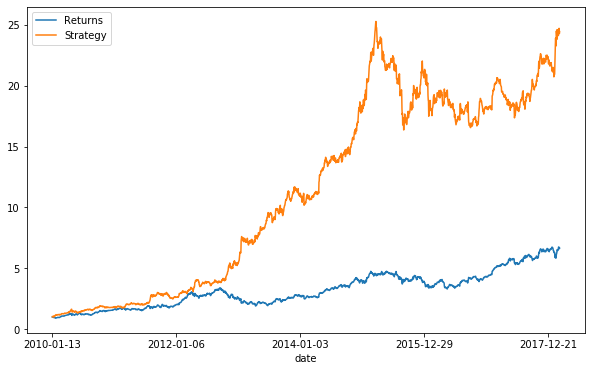

In [12]:
data['Prediction'] = model.predict(X)
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.show()